# Predicción de la supervivencia en el Titanic con regresión logística.

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [29]:
# Se importan las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías para modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

In [2]:
# Se carga el dataset
data = pd.read_csv('./Titanic-Dataset.csv')

In [3]:
# Se realiza lectura de datos para el análisis exploratorio
data.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Eliminar columnas irrelevantes
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [5]:
data.head(40)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [6]:
# Descripción de los datos
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

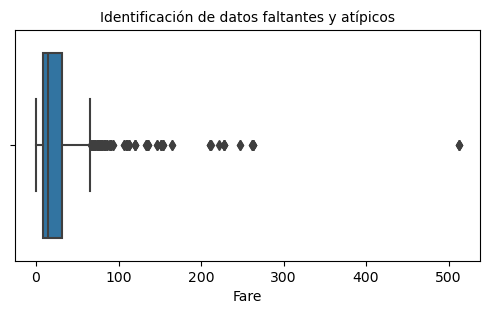

In [7]:
# Identificación de datos faltantes y atípicos
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Fare'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10)

In [8]:
# Conteo de datos atípicos
nivel_min = 0
nivel_max = 500
total_atipicos = ((data['Fare']<nivel_min)|(data['Fare']>nivel_max)).sum()
print("El total de datos atípicos es {}".format(total_atipicos))

El total de datos atípicos es 3


In [9]:
# Filtrar datos atípicos
data=data[(data['Fare']<nivel_max)&(data['Fare']>nivel_min)]

In [10]:
# Se valida si se removieron los datos atípicos
total_atipicos=((data['Fare']<nivel_min)|(data['Fare']>nivel_max)).sum()
print("El total de datos atípicos es {}".format(total_atipicos))

El total de datos atípicos es 0


### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

## Característica de interés:
* Survived: Indica si la persona a bordo del Titanic sobrevivió o no. (0 = no sobrevivió - 1 = sobrevivió)
* Predecir si una persona a bordo del Titanic habría sobrevivido o no al hundimiento.

In [11]:
# Total
data['Survived'].value_counts()

Survived
0    535
1    338
Name: count, dtype: int64

In [12]:
data[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [13]:
# Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información de entrenamiento

X = data.drop('Survived',axis=1)
Y = data['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [14]:
print (X_train)

     PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
638          639       3  female  41.0      0      5   39.6875        S
176          177       3    male   NaN      3      1   25.4667        S
625          626       1    male  61.0      0      0   32.3208        S
731          732       3    male  11.0      0      0   18.7875        C
332          333       1    male  38.0      0      1  153.4625        S
..           ...     ...     ...   ...    ...    ...       ...      ...
6              7       1    male  54.0      0      0   51.8625        S
738          739       3    male   NaN      0      0    7.8958        S
720          721       2  female   6.0      0      1   33.0000        S
782          783       1    male  29.0      0      0   30.0000        S
376          377       3  female  22.0      0      0    7.2500        S

[654 rows x 8 columns]


In [15]:
print (Y_train)

638    0
176    0
625    0
731    0
332    0
      ..
6      0
738    0
720    1
782    0
376    1
Name: Survived, Length: 654, dtype: int64


### 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [23]:
# Definir transformaciones para columnas numéricas y categóricas
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [30]:
# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [31]:
# Crear y entrenar el modelo con el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='liblinear'))])

In [33]:
# Entrenar el modelo
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [34]:
# Realizar predicciones
predicciones = pipeline.predict(X_test)

In [35]:
print (predicciones)

[1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1
 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0]


### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [36]:
# Desempeño del modelo de regresión
print(classification_report(Y_test, predicciones))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.77      0.71      0.74        85

    accuracy                           0.80       219
   macro avg       0.80      0.79      0.79       219
weighted avg       0.80      0.80      0.80       219



### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

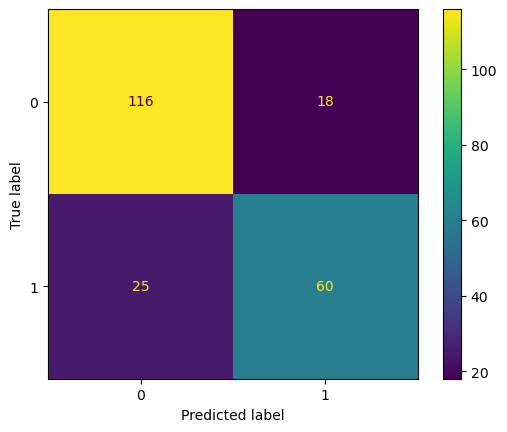

In [37]:
# Matrix de confusión
cm=confusion_matrix(Y_test, predicciones)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

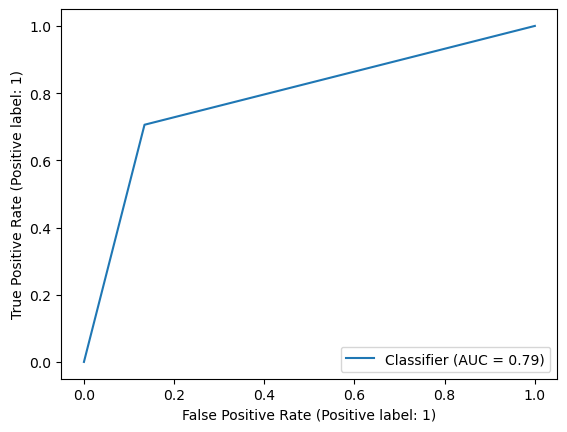

In [38]:
# Curva de precisión del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, predicciones)
plt.show()